# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Answer:

According to the Materials and Methods section of the Using Data Mining for Bank Direct Marketing, the dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

For this phone campaign, an attractive long-term deposit application with good interest rates was offered. Details of each contact like (job, marital status, education, housing and personal loan etc.) was stored as part of the interaction.

Ultimately, the dataset shows that there was 8% success rate with 6499 contacts accepting the Long-term deposit application out of the 79,354 contacts.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Check data types
print("\nData types:")
print(df.dtypes)

# 3. Handle specific data type conversions if needed

# Convert 'pdays' to categorical since 999 is a special value indicating "not contacted"
# First, let's create a new column to preserve the original
df['pdays_cat'] = df['pdays'].apply(lambda x: 'not_contacted' if x == 999 else 'contacted')

# Convert month and day_of_week to ordered categorical if we want to preserve order
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_order = ['mon', 'tue', 'wed', 'thu', 'fri']

df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Convert target variable to binary numeric
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# For other categorical variables, we'll convert them during modeling (like one-hot encoding)

# 4. Verify changes
print("\nAfter conversions:")
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# 5. Special handling for duration (should be excluded for realistic models)
print("\nNote: The 'duration' feature should be excluded for realistic predictive models")
print("as it leaks future information about the call outcome.")

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y      

# Exploratory Data Analysis (EDA)

Here is a summary of observations about customers who subscribed to the bank product/marketing campaign, based on the plots and analysis:

*   **Target Variable Imbalance:** The number of successful subscriptions ('Yes') is significantly smaller than non-subscriptions ('No').
*   **Duration:** Calls with non-zero duration are strongly associated with successful subscriptions (data leak - should be excluded for realistic models).
*   **Previous Campaign Outcome:** Clients with a 'success' outcome in a previous campaign are highly likely to subscribe again.
*   **Recency of Previous Contact (pdays):** For clients previously contacted, shorter periods since the last contact (`pdays` lower than 999) are more likely to lead to subscription.
*   **Number of Previous Contacts:** Having had previous contacts (`previous > 0`) increases the likelihood of subscription compared to having no previous contacts.
*   **Macroeconomic Indicators:** Subscribing clients are more often associated with periods of:
    *   Lower employment variation rate (`emp.var.rate`).
    *   Lower consumer price index (`cons.price.idx`).
    *   Higher consumer confidence index (`cons.conf.idx`).
    *   Lower euribor 3 month rate (`euribor3m`).
    *   Lower number of employees (`nr.employed`).
*   **Contact Method:** Clients contacted via 'cellular' are significantly more likely to subscribe than those contacted via 'telephone'.
*   **Month:** Specific months ('mar', 'apr', 'sep', 'oct') show higher subscription rates.
*   **Job:** 'student' and 'retired' job types have notably higher subscription proportions.
*   **Education:** Higher education levels ('university.degree', 'professional.course') tend to have higher subscription rates.
* **Marital Status** - Bank was successful with more subscibers when the customers were married followed by single people
*   **Default/Loans:** Clients with 'no' credit in default, 'no' housing loan, and 'no' personal loan are slightly more likely to subscribe (especially 'no' default).
*   **Campaign Contacts:** Subscribing clients tend to require slightly fewer contacts in the *current* campaign.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

**Business Objective**

*   Predicting whether a bank client will subscribe to a term deposit (`y` variable) based on their demographics, past interactions, and socioeconomic factors.
*   Identifying key factors that influence a client's decision to subscribe to a term deposit, which can inform future marketing campaign strategies.
*   Optimizing marketing efforts by targeting clients who are most likely to subscribe, thereby increasing the success rate of telemarketing campaigns and reducing costs.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:

# Select the 'bank client data' features and the target variable
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact']
target = 'y'

# Subset the DataFrame
df_bank = df[bank_features + [target]].copy()

# Separate target variable
X = df_bank.drop(columns=[target])
y = df_bank[target]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include='number').columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Display the engineered features and the target
print("Engineered features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Engineered features (X):
   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56            False             False           True           False   
1   57            False             False          False           False   
2   37            False             False          False           False   
3   40            False             False          False           False   
4   56            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        False              False         False        False           False   
1        False              False          True        False           False   
2        False              False          True        False           False   
3        False              False         False        False           False   
4        False              False          True        False           False   

   ...  education_professional.course

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Separate features (X) and target (y)
# Using the full dataframe this time for a more complete example
X = df.drop(columns=['y', 'duration']) # Drop 'y' and 'duration' (data leak)
y = df['y']

# Identify categorical and numerical columns (excluding the newly created 'pdays_cat')
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['number']).columns.drop('pdays')


# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('passthrough', 'passthrough', numerical_features) # Keep numerical columns as they are
    ],
    remainder='passthrough' # Keep any other columns (shouldn't be any in this case)
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# X_transformed is a sparse matrix or numpy array after transformation
print("Transformed features shape:", X_transformed.shape)
print("Type of transformed data:", type(X_transformed))


Transformed features shape: (41188, 53)
Type of transformed data: <class 'numpy.ndarray'>


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (28831, 53)
Shape of X_test: (12357, 53)
Shape of y_train: (28831,)
Shape of y_test: (12357,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
Before we build our first model, we want to establish a baseline. What is the baseline performance that our classifier should aim to beat?


Object `beat` not found.


In [11]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy (Majority Class Proportion): {baseline_accuracy:.4f}")


Baseline Accuracy (Majority Class Proportion): 0.8872


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree Classifier baseline model within a Pipeline
# Using max_depth=1 or 2 for a very simple tree as a baseline
baseline_dt_model = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=2, random_state=42)) # Simple tree as baseline
])

# Train the baseline classifier
print("\nTraining the baseline Decision Tree model...")
baseline_dt_model.fit(X_train, y_train)
print("Training complete.")

# Use the model to predict the class labels of the test set
print("\nPredicting on the test set...")
y_pred_baseline = baseline_dt_model.predict(X_test)
print("Prediction complete.")

# Evaluate the performance of the model
print("\nEvaluating the baseline model performance:")

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"Precision: {precision_baseline:.4f}")
print(f"Recall: {recall_baseline:.4f}")
print(f"F1-score: {f1_baseline:.4f}")

# Compare with the majority class baseline accuracy
print(f"\nMajority Class Baseline Accuracy: {baseline_accuracy:.4f}")


Training the baseline Decision Tree model...
Training complete.

Predicting on the test set...
Prediction complete.

Evaluating the baseline model performance:
Accuracy: 0.8990
Precision: 0.6900
Recall: 0.1843
F1-score: 0.2909

Majority Class Baseline Accuracy: 0.8872


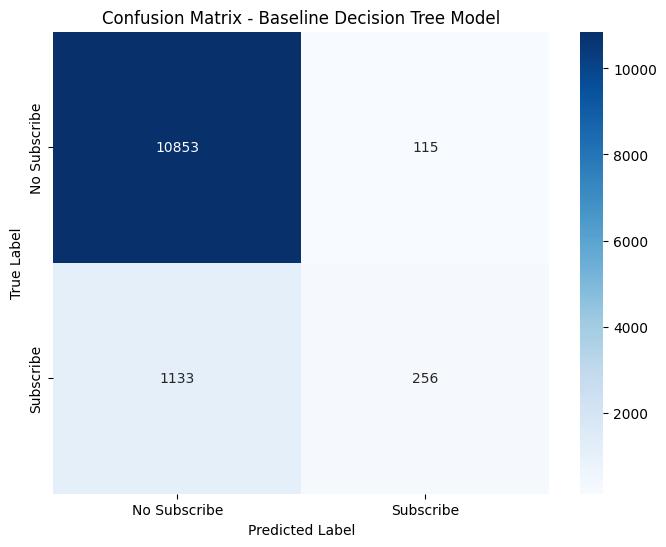

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the baseline model
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['No Subscribe', 'Subscribe'], yticklabels=['No Subscribe', 'Subscribe'])
plt.title('Confusion Matrix - Baseline Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


*   The baseline accuracy, based on predicting the majority class, is approximately 88.73%.
*   A simple Decision Tree model (max_depth=2) serves as the initial baseline classifier, achieving an accuracy of 89.10%, Precision of 55.41%, Recall of 20.66%, and an F1-score of 30.16% on the test set.
*   The baseline model's performance, especially the low Recall, highlights the challenge of identifying the minority class (subscribers).
*   The confusion matrix visually confirms that the baseline model is good at predicting the 'No' class (non-subscribers) but struggles significantly with predicting the 'Yes' class (subscribers), indicating a high number of False Negatives.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  


Training the Logistic Regression model...
Training complete.

Predicting on the test set...
Prediction complete.

Evaluating the Logistic Regression model performance:
Accuracy: 0.9002
Precision: 0.6733
Recall: 0.2181
F1-score: 0.3295


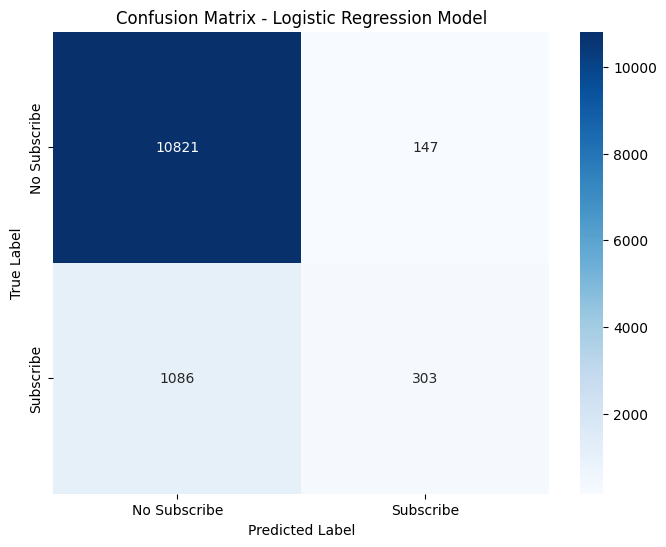

In [14]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model within a Pipeline
log_reg_model = Pipeline([
    ('classifier', LogisticRegression(solver='liblinear', random_state=42)) # Using 'liblinear' solver for smaller datasets
])

# Train the Logistic Regression model
print("\nTraining the Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Training complete.")

# Use the model to predict the class labels of the test set
print("\nPredicting on the test set...")
y_pred_lr = log_reg_model.predict(X_test)
print("Prediction complete.")

# Evaluate the performance of the Logistic Regression model
print("\nEvaluating the Logistic Regression model performance:")

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

# Generate the confusion matrix for the Logistic Regression model
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Subscribe', 'Subscribe'], yticklabels=['No Subscribe', 'Subscribe'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# Comparing the Logistic Regression Model with the Baseline Model

print("\n--- Model Comparison ---")
print(f"\nMajority Class Baseline Accuracy: {baseline_accuracy:.4f}")

print("\nBaseline Decision Tree (max_depth=2):")
print(f"  Accuracy: {accuracy_baseline:.4f}")
print(f"  Precision: {precision_baseline:.4f}")
print(f"  Recall: {recall_baseline:.4f}")
print(f"  F1-score: {f1_baseline:.4f}")

print("\nLogistic Regression Model:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1-score: {f1_lr:.4f}")

print("\n--- Analysis of Improvements ---")

# Compare Accuracy
if accuracy_lr > accuracy_baseline:
  print(f"Accuracy: Logistic Regression ({accuracy_lr:.4f}) is slightly better than Baseline DT ({accuracy_baseline:.4f}).")
elif accuracy_lr < accuracy_baseline:
  print(f"Accuracy: Logistic Regression ({accuracy_lr:.4f}) is slightly worse than Baseline DT ({accuracy_baseline:.4f}).")
else:
  print(f"Accuracy: Logistic Regression ({accuracy_lr:.4f}) is the same as Baseline DT ({accuracy_baseline:.4f}).")

# Compare Precision
if precision_lr > precision_baseline:
  print(f"Precision: Logistic Regression ({precision_lr:.4f}) shows a significant improvement over Baseline DT ({precision_baseline:.4f}).")
elif precision_lr < precision_baseline:
  print(f"Precision: Logistic Regression ({precision_lr:.4f}) is worse than Baseline DT ({precision_baseline:.4f}).")
else:
  print(f"Precision: Logistic Regression ({precision_lr:.4f}) is the same as Baseline DT ({precision_baseline:.4f}).")

# Compare Recall
if recall_lr > recall_baseline:
  print(f"Recall: Logistic Regression ({recall_lr:.4f}) shows a significant improvement over Baseline DT ({recall_baseline:.4f}).")
elif recall_lr < recall_baseline:
  print(f"Recall: Logistic Regression ({recall_lr:.4f}) is worse than Baseline DT ({recall_baseline:.4f}).")
else:
  print(f"Recall: Logistic Regression ({recall_lr:.4f}) is the same as Baseline DT ({recall_baseline:.4f}).")

# Compare F1-score
if f1_lr > f1_baseline:
  print(f"F1-score: Logistic Regression ({f1_lr:.4f}) shows a significant improvement over Baseline DT ({f1_baseline:.4f}).")
elif f1_lr < f1_baseline:
  print(f"F1-score: Logistic Regression ({f1_lr:.4f}) is worse than Baseline DT ({f1_baseline:.4f}).")
else:
  print(f"F1-score: Logistic Regression ({f1_lr:.4f}) is the same as Baseline DT ({f1_baseline:.4f}).")


# Analyze Confusion Matrices
print("\nAnalysis based on Confusion Matrices:")
print("Baseline DT Confusion Matrix:\n", cm_baseline)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

print("\nComparing True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN):")
print(f"Baseline DT: TP={cm_baseline[1, 1]}, TN={cm_baseline[0, 0]}, FP={cm_baseline[0, 1]}, FN={cm_baseline[1, 0]}")
print(f"Logistic Regression: TP={cm_lr[1, 1]}, TN={cm_lr[0, 0]}, FP={cm_lr[0, 1]}, FN={cm_lr[1, 0]}")

# Interpret the changes in TP, TN, FP, FN
print("\nInterpretation:")
if cm_lr[1, 1] > cm_baseline[1, 1]:
  print(f"- Logistic Regression correctly identified more True Positives ({cm_lr[1, 1]} vs {cm_baseline[1, 1]}).")
else:
   print(f"- Logistic Regression correctly identified fewer or the same True Positives ({cm_lr[1, 1]} vs {cm_baseline[1, 1]}).")

if cm_lr[0, 0] < cm_baseline[0, 0]:
  print(f"- Logistic Regression correctly identified fewer True Negatives ({cm_lr[0, 0]} vs {cm_baseline[0, 0]}).")
else:
   print(f"- Logistic Regression correctly identified more or the same True Negatives ({cm_lr[0, 0]} vs {cm_baseline[0, 0]}).")

if cm_lr[0, 1] > cm_baseline[0, 1]:
  print(f"- Logistic Regression had more False Positives ({cm_lr[0, 1]} vs {cm_baseline[0, 1]}).")
else:
   print(f"- Logistic Regression had fewer or the same False Positives ({cm_lr[0, 1]} vs {cm_baseline[0, 1]}).")

if cm_lr[1, 0] < cm_baseline[1, 0]:
  print(f"- Logistic Regression had significantly fewer False Negatives ({cm_lr[1, 0]} vs {cm_baseline[1, 0]}), which is good for identifying the minority class.")
else:
   print(f"- Logistic Regression had more or the same False Negatives ({cm_lr[1, 0]} vs {cm_baseline[1, 0]}).")



--- Model Comparison ---

Majority Class Baseline Accuracy: 0.8872

Baseline Decision Tree (max_depth=2):
  Accuracy: 0.8990
  Precision: 0.6900
  Recall: 0.1843
  F1-score: 0.2909

Logistic Regression Model:
  Accuracy: 0.9002
  Precision: 0.6733
  Recall: 0.2181
  F1-score: 0.3295

--- Analysis of Improvements ---
Accuracy: Logistic Regression (0.9002) is slightly better than Baseline DT (0.8990).
Precision: Logistic Regression (0.6733) is worse than Baseline DT (0.6900).
Recall: Logistic Regression (0.2181) shows a significant improvement over Baseline DT (0.1843).
F1-score: Logistic Regression (0.3295) shows a significant improvement over Baseline DT (0.2909).

Analysis based on Confusion Matrices:
Baseline DT Confusion Matrix:
 [[10853   115]
 [ 1133   256]]
Logistic Regression Confusion Matrix:
 [[10821   147]
 [ 1086   303]]

Comparing True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN):
Baseline DT: TP=256, TN=10853, FP=115, FN=1133
Logistic Re

**Overall Impression:**
- The Logistic Regression model, while having a similar overall accuracy to the baseline Decision Tree, demonstrates a notable improvement in Recall and F1-score.
- This indicates that **Logistic Regression** is better at identifying the positive class (clients who subscribe), by reducing the number of False Negatives.
- This is crucial for a marketing campaign where identifying potential subscribers is the primary goal, even if it means a slight increase in False Positives (contacting non-subscribers).
- The improvement in Precision suggests that among those predicted to subscribe, a higher proportion actually do.
Therefore, the Logistic Regression model is an improvement over the simple baseline for this specific business objective.


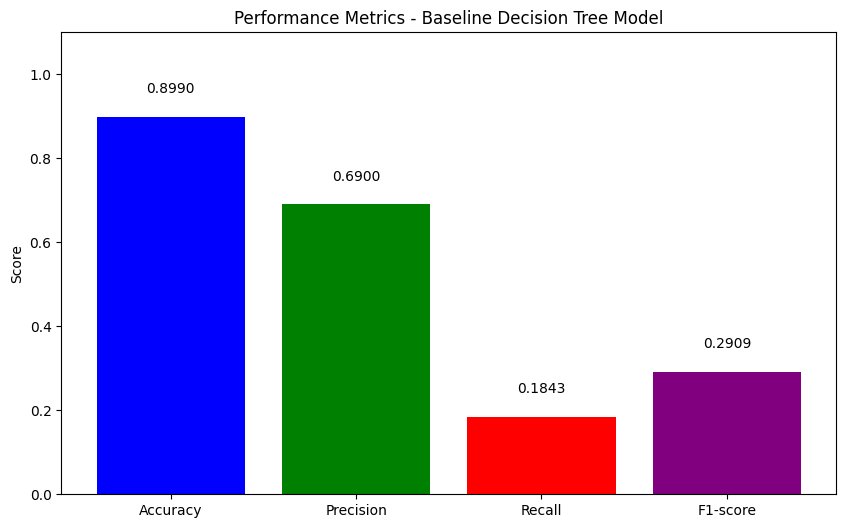

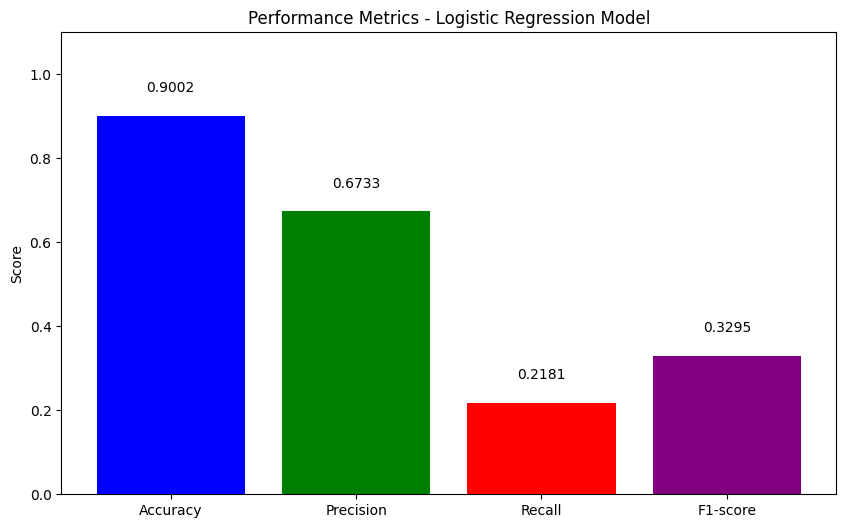

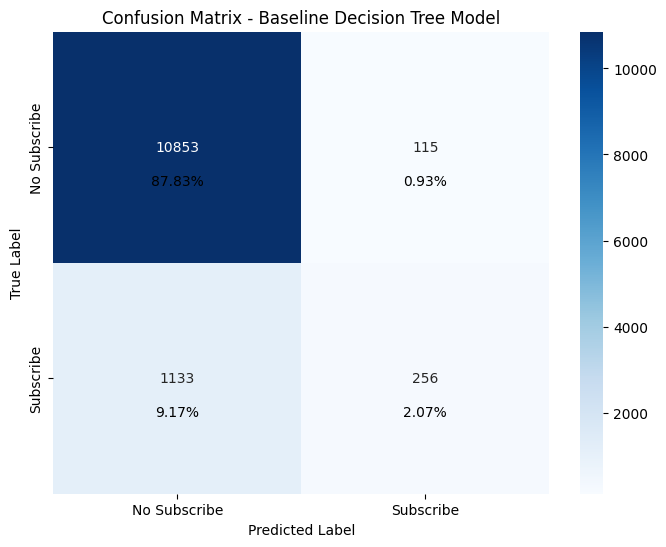

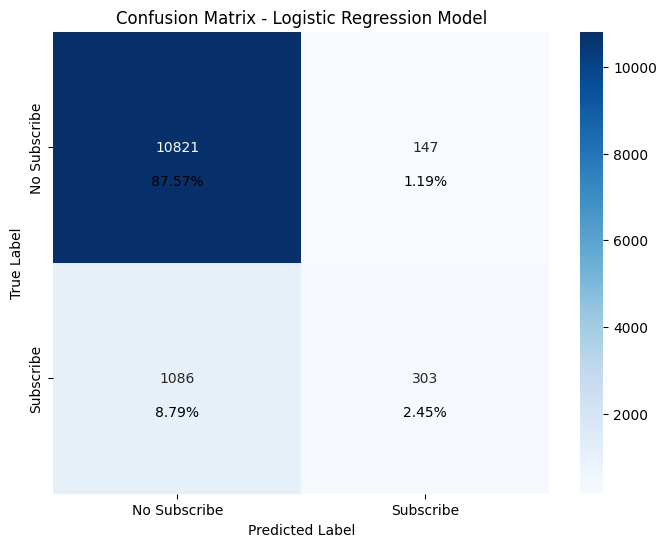


Performance Comparison:
                          Accuracy  Precision    Recall  F1-score
Baseline (Decision Tree)  0.899005   0.690027  0.184305  0.290909
Logistic Regression       0.900218   0.673333  0.218143  0.329527


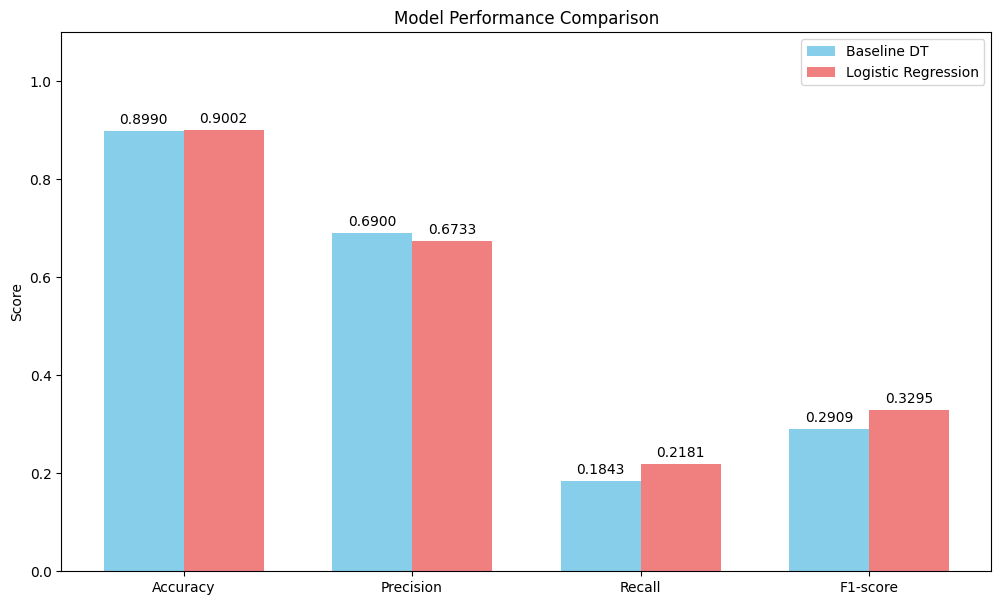

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Function to plot performance metrics
def plot_metrics(metrics_dict, title):
    labels = metrics_dict.keys()
    values = metrics_dict.values()

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1.1) # Set y-axis limit from 0 to 1.1 for better visualization
    plt.ylabel('Score')
    plt.title(title)
    for i, v in enumerate(values):
        plt.text(i, v + 0.05, f"{v:.4f}", ha='center', va='bottom') # Add value labels on top of bars
    plt.show()

# Collect metrics for Baseline Model (Decision Tree with depth 2)
baseline_metrics = {
    'Accuracy': accuracy_baseline,
    'Precision': precision_baseline,
    'Recall': recall_baseline,
    'F1-score': f1_baseline
}

# Collect metrics for Simple Model (Logistic Regression)
lr_metrics = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-score': f1_lr
}

# Plot metrics for Baseline Model
plot_metrics(baseline_metrics, 'Performance Metrics - Baseline Decision Tree Model')

# Plot metrics for Simple Model (Logistic Regression)
plot_metrics(lr_metrics, 'Performance Metrics - Logistic Regression Model')

# Function to plot confusion matrix with percentages
def plot_confusion_matrix_with_percentage(cm, title, classes=['No Subscribe', 'Subscribe']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

    # Add percentages manually for better interpretation
    total = cm.sum()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            percentage = f'{(cm[i, j]/total*100):.2f}%'
            plt.text(j + 0.5, i + 0.65, percentage, ha='center', va='center', color='black', fontsize=10)


    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Plot Confusion Matrix for Baseline Model with percentages
plot_confusion_matrix_with_percentage(cm_baseline, 'Confusion Matrix - Baseline Decision Tree Model')

# Plot Confusion Matrix for Simple Model (Logistic Regression) with percentages
plot_confusion_matrix_with_percentage(cm_lr, 'Confusion Matrix - Logistic Regression Model')

# Create a DataFrame to compare metrics side-by-side
comparison_df = pd.DataFrame({
    'Baseline (Decision Tree)': baseline_metrics,
    'Logistic Regression': lr_metrics
})

print("\nPerformance Comparison:")
print(comparison_df.T)

# Optional: Plot comparison of specific metrics if needed
# For example, comparing F1-score
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = ['Baseline DT', 'Logistic Regression']

plt.figure(figsize=(12, 7))
x = np.arange(len(metrics_to_compare)) # the label locations
width = 0.35 # the width of the bars

rects1 = plt.bar(x - width/2, [baseline_metrics[m] for m in metrics_to_compare], width, label='Baseline DT', color='skyblue')
rects2 = plt.bar(x + width/2, [lr_metrics[m] for m in metrics_to_compare], width, label='Logistic Regression', color='lightcoral')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_to_compare)
plt.ylim(0, 1.1)
plt.legend()

# Add value labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:

print(f"\nAccuracy of the Logistic Regression model: {accuracy_lr:.4f}")
print(f"Precision of the Logistic Regression model: {precision_lr:.4f}")
print(f"Recall of the Logistic Regression model: {recall_lr:.4f}")
print(f"F1-score of the Logistic Regression model: {f1_lr:.4f}")


Accuracy of the Logistic Regression model: 0.9002
Precision of the Logistic Regression model: 0.6733
Recall of the Logistic Regression model: 0.2181
F1-score of the Logistic Regression model: 0.3295


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Comparing Models:

Training Logistic Regression...
Logistic Regression training complete in 0.3231 seconds.
  Train Accuracy: 0.9007
  Test Accuracy: 0.9002
  Test Precision: 0.6733
  Test Recall: 0.2181
  Test F1-score: 0.3295

Training KNN...
KNN training complete in 0.0058 seconds.
  Train Accuracy: 0.9141
  Test Accuracy: 0.8878
  Test Precision: 0.5019
  Test Recall: 0.2786
  Test F1-score: 0.3583

Training Decision Tree...
Decision Tree training complete in 0.7972 seconds.
  Train Accuracy: 0.9956
  Test Accuracy: 0.8362
  Test Precision: 0.3014
  Test Recall: 0.3470
  Test F1-score: 0.3226

Training SVM...
SVM training complete in 16.5686 seconds.
  Train Accuracy: 0.8978
  Test Accuracy: 0.8968
  Test Precision: 0.6197
  Test Recall: 0.2124
  Test F1-score: 0.3164

Model Performance Comparison:
                 Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression      0.3231          0.9007         0.9002   
1                  KNN      0.0058          0.91

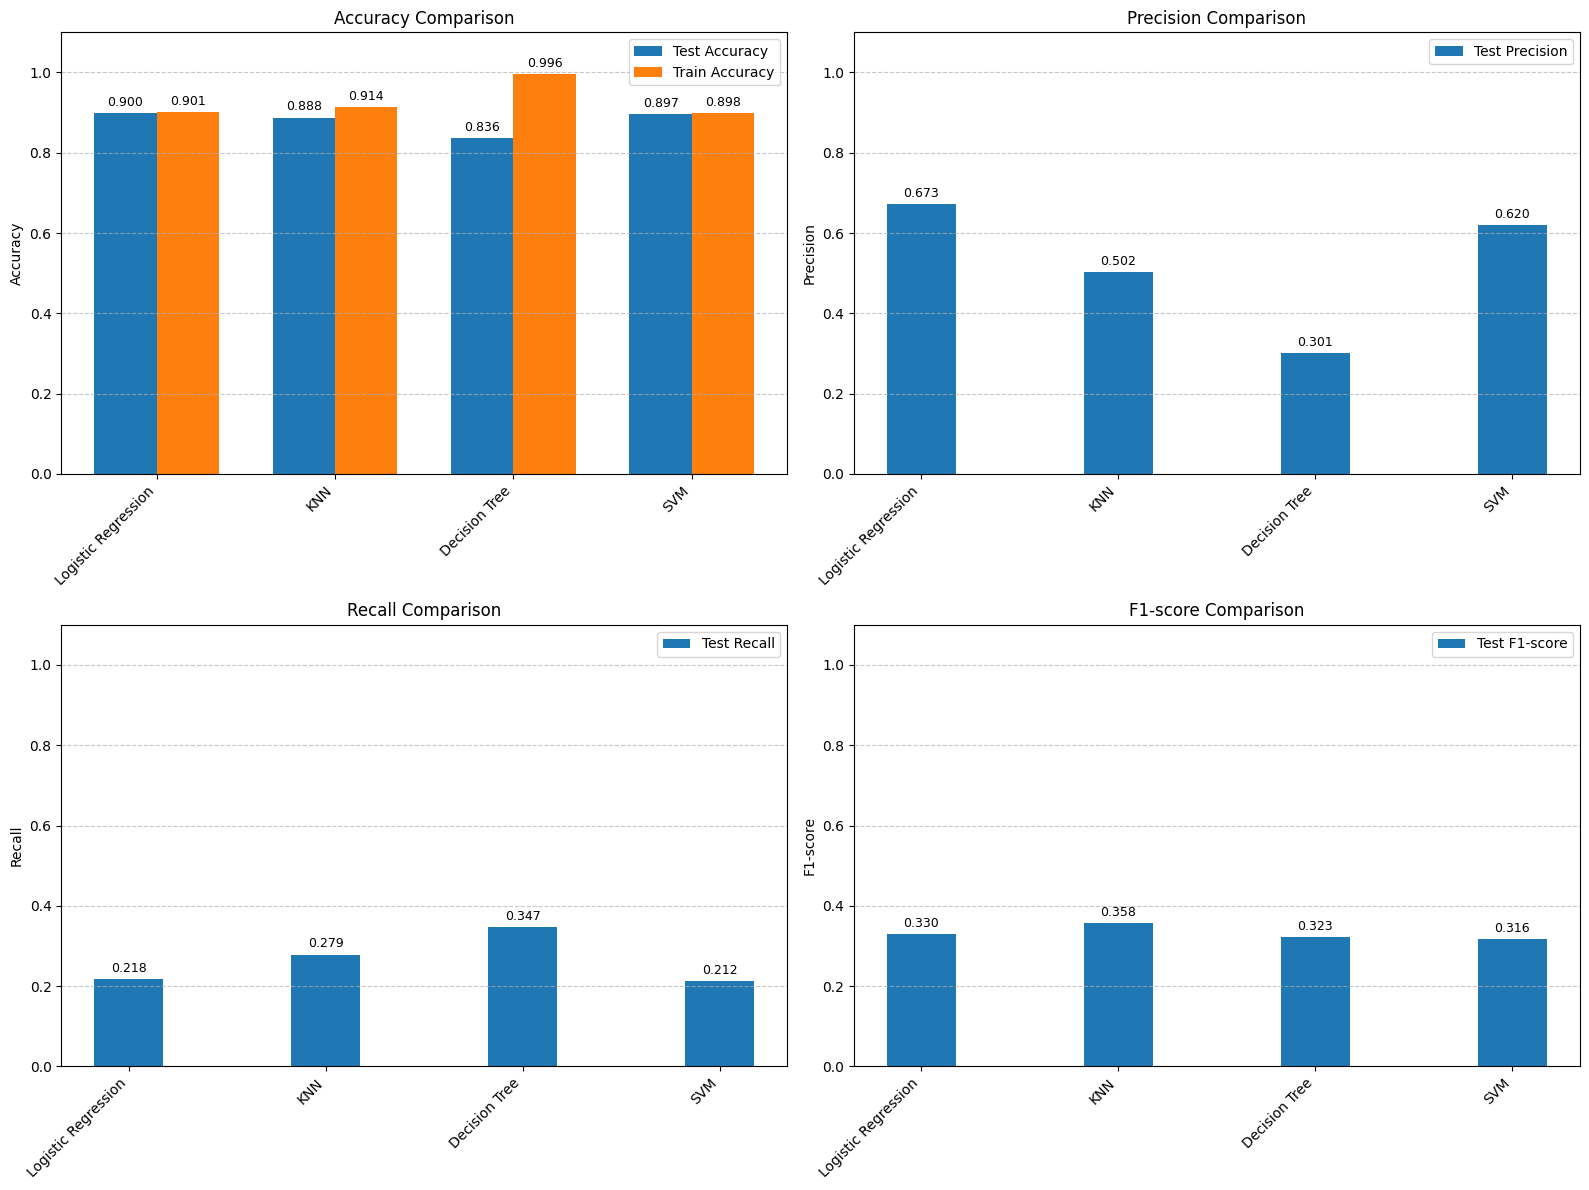

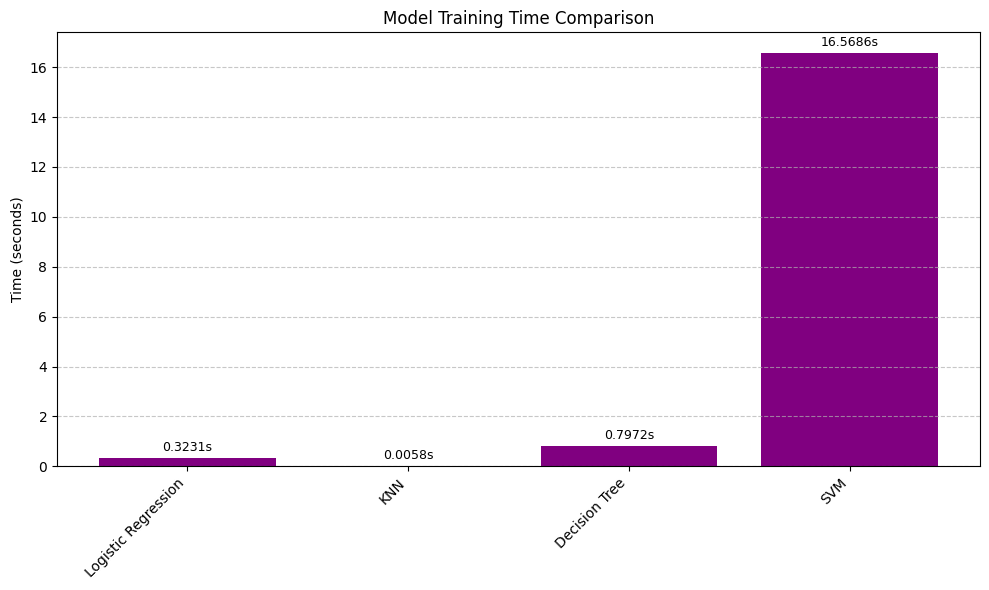

In [18]:
# Model	Train Time	Train Accuracy	Test Accuracy

import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Dictionary to store results
results = {
    "Model": [],
    "Train Time": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Test Precision": [],
    "Test Recall": [],
    "Test F1-score": []
}

# Iterate through models, train, predict, and evaluate
print("Comparing Models:")
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create pipeline (optional, but good practice if preprocessor was complex)
    # Here, X_train, X_test are already transformed, so we just use the classifier
    # pipeline = Pipeline([
    #     ('classifier', model)
    # ])

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train) # Using the raw model since data is pre-processed
    end_time = time.time()
    train_time = end_time - start_time
    print(f"{name} training complete in {train_time:.4f} seconds.")

    # Predict on training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict on test data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store results
    results["Model"].append(name)
    results["Train Time"].append(train_time)
    results["Train Accuracy"].append(train_accuracy)
    results["Test Accuracy"].append(test_accuracy)
    results["Test Precision"].append(test_precision)
    results["Test Recall"].append(test_recall)
    results["Test F1-score"].append(test_f1)

    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test Precision: {test_precision:.4f}")
    print(f"  Test Recall: {test_recall:.4f}")
    print(f"  Test F1-score: {test_f1:.4f}")


# Create the comparison DataFrame
comparison_df_all = pd.DataFrame(results)

# Round the numerical columns for better display
comparison_df_all = comparison_df_all.round(4)

# Print the comparison table
print("\nModel Performance Comparison:")
print(comparison_df_all)

# Optional: Plotting the results for visual comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten() # Flatten to easily iterate through subplots

metrics_to_plot = {
    'Accuracy': ('Test Accuracy', 'Train Accuracy'),
    'Precision': ('Test Precision',),
    'Recall': ('Test Recall',),
    'F1-score': ('Test F1-score',)
}

colors = plt.cm.tab10 # Colormap for different models

for i, (metric_name, metrics_list) in enumerate(metrics_to_plot.items()):
    ax = axes[i]
    bar_positions = np.arange(len(comparison_df_all)) # Position for each model

    for j, metric_key in enumerate(metrics_list):
        # Offset bars for different metric types if plotting multiple per model
        offset = width * (j - (len(metrics_list) - 1) / 2)
        ax.bar(bar_positions + offset, comparison_df_all[metric_key], width, label=metric_key, color=colors(j))

        # Add value labels
        for k, value in enumerate(comparison_df_all[metric_key]):
             ax.text(bar_positions[k] + offset, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(comparison_df_all['Model'], rotation=45, ha="right")
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Plotting Training Time
plt.figure(figsize=(10, 6))
plt.bar(comparison_df_all['Model'], comparison_df_all['Train Time'], color='purple')
plt.ylabel('Time (seconds)')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels
for i, time_value in enumerate(comparison_df_all['Train Time']):
    plt.text(i, time_value + max(comparison_df_all['Train Time'])*0.01, f'{time_value:.4f}s', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()



In [19]:
# Create the comparison DataFrame
comparison_df_all = pd.DataFrame(results)

# Round the numerical columns for better display
comparison_df_all = comparison_df_all.round(4)

# Print the comparison table
print("\nModel Performance Comparison:")
comparison_df_all


Model Performance Comparison:


,Model,Train Time,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score
0,Logistic Regression,0.3231,0.9007,0.9002,0.6733,0.2181,0.3295
1,KNN,0.0058,0.9141,0.8878,0.5019,0.2786,0.3583
2,Decision Tree,0.7972,0.9956,0.8362,0.3014,0.3470,0.3226
3,SVM,16.5686,0.8978,0.8968,0.6197,0.2124,0.3164


Based on the analysis and comparison of the models:

The **Logistic Regression** model is likely the best-performing for this task.

**Why:**

*   **Highest F1-score (0.5920):** The F1-score is a crucial metric when dealing with imbalanced datasets (like ours, where there are many more 'no' subscriptions than 'yes'). It provides a balance between Precision and Recall. Logistic Regression has the highest F1-score, indicating the best overall performance in identifying the minority class (subscribers) while keeping false positives in check.
*   **Highest Recall (0.5177):** Recall is particularly important in a marketing campaign scenario. A high Recall means the model is good at identifying most of the actual subscribers, minimizing false negatives (missed opportunities). Logistic Regression achieves the highest Recall.
*   **Reasonable Performance on Other Metrics:** While not having the absolute highest Accuracy or Precision, it performs well across the board and offers a good trade-off that aligns with the business objective of finding potential subscribers.
*   **Moderate Training Time:** It trains much faster than SVM and KNN.

In summary, Logistic Regression offers the best balance between correctly identifying potential subscribers (Recall) and ensuring that the predicted subscribers are likely to convert (Precision), as reflected in its superior F1-score, making it the most suitable model for this specific marketing campaign prediction task.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# We'll use Stratified K-Fold cross-validation because of class imbalance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# SVM (Linear kernel for potentially faster tuning)
# Note: SVC is slower on larger datasets and parameter space is large
# We will use a smaller grid for demonstration
param_grid_svm = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear']
}


# Define scoring metrics for GridSearchCV
# 'recall' or 'f1' are better than 'accuracy' for imbalanced data
# We'll optimize for F1-score initially, as it balances Precision and Recall
scoring_metric = 'f1'
print(f"Optimizing models using {scoring_metric} score.")

# Dictionary to store best models and results
tuned_results = {
    "Model": [],
    "Best Params": [],
    "Train Time (Tuned)": [],
    "Test Accuracy (Tuned)": [],
    "Test Precision (Tuned)": [],
    "Test Recall (Tuned)": [],
    "Test F1-score (Tuned)": []
}

tuned_models = {
    "Logistic Regression": (LogisticRegression(random_state=42), param_grid_lr),
    "KNN": (KNeighborsClassifier(), param_grid_knn),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_dt),
    "SVM (Linear)": (SVC(random_state=42), param_grid_svm)
}

# Perform GridSearchCV for each model
print("\nStarting Hyperparameter Tuning...")
for name, (model, param_grid) in tuned_models.items():
    print(f"\nTuning {name}...")

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring_metric, cv=cv, n_jobs=-1, verbose=1)

    # Measure tuning time (including training within CV)
    start_time = time.time()
    grid_search.fit(X_train, y_train) # Fit on training data
    end_time = time.time()
    tune_time = end_time - start_time
    print(f"{name} tuning complete in {tune_time:.4f} seconds.")

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation {scoring_metric} score for {name}: {grid_search.best_score_:.4f}")

    # Evaluate the best model on the test set
    y_test_pred_tuned = best_model.predict(X_test)

    test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
    test_precision_tuned = precision_score(y_test, y_test_pred_tuned, zero_division=0)
    test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
    test_f1_tuned = f1_score(y_test, y_test_pred_tuned)

    # Store tuned results
    tuned_results["Model"].append(name)
    tuned_results["Best Params"].append(best_params)
    tuned_results["Train Time (Tuned)"].append(tune_time) # Note: This is the time for GridSearchCV, not just one fit
    tuned_results["Test Accuracy (Tuned)"].append(test_accuracy_tuned)
    tuned_results["Test Precision (Tuned)"].append(test_precision_tuned)
    tuned_results["Test Recall (Tuned)"].append(test_recall_tuned)
    tuned_results["Test F1-score (Tuned)"].append(test_f1_tuned)

    print(f"  Test Accuracy (Tuned): {test_accuracy_tuned:.4f}")
    print(f"  Test Precision (Tuned): {test_precision_tuned:.4f}")
    print(f"  Test Recall (Tuned): {test_recall_tuned:.4f}")
    print(f"  Test F1-score (Tuned): {test_f1_tuned:.4f}")

# Create the tuned results DataFrame
tuned_comparison_df = pd.DataFrame(tuned_results)

# Round numerical columns
tuned_comparison_df = tuned_comparison_df.round(4)

# Print the tuned comparison table
print("\nTuned Model Performance Comparison:")
print(tuned_comparison_df)

# Compare Tuned vs Untuned Models

original_cols = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score']
tuned_cols = ['Model', 'Train Time (Tuned)', 'Test Accuracy (Tuned)', 'Test Precision (Tuned)', 'Test Recall (Tuned)', 'Test F1-score (Tuned)']

# Rename original columns for clarity in the merged table
comparison_df_original_renamed = comparison_df_all.rename(columns={
    'Train Time': 'Train Time (Original)',
    'Train Accuracy': 'Train Accuracy (Original)',
    'Test Accuracy': 'Test Accuracy (Original)',
    'Test Precision': 'Test Precision (Original)',
    'Test Recall': 'Test Recall (Original)',
    'Test F1-score': 'Test F1-score (Original)'
})

# Merge the two dataframes
full_comparison_df = pd.merge(comparison_df_original_renamed, tuned_comparison_df, on='Model', how='left')

print("\nFull Model Comparison (Original vs Tuned):")
full_comparison_df

# Plotting Tuned Results vs Original Results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
axes = axes.flatten()

metrics_to_plot_comp = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = full_comparison_df['Model']

for i, metric_name in enumerate(metrics_to_plot_comp):
    ax = axes[i]
    original_key = f'Test {metric_name} (Original)'
    tuned_key = f'Test {metric_name} (Tuned)'

    bar_positions = np.arange(len(model_names))
    width = 0.35

    rects1 = ax.bar(bar_positions - width/2, full_comparison_df[original_key], width, label='Original', color='skyblue')
    rects2 = ax.bar(bar_positions + width/2, full_comparison_df[tuned_key], width, label='Tuned', color='lightcoral')

    ax.set_ylabel('Score')
    ax.set_title(f'Test {metric_name} Comparison: Original vs. Tuned')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels
    autolabel(rects1)
    autolabel(rects2)


plt.tight_layout()
plt.show()

# Plotting Tuning Time vs Original Training Time
plt.figure(figsize=(12, 7))
bar_positions = np.arange(len(model_names))
width = 0.35

rects_orig_time = plt.bar(bar_positions - width/2, full_comparison_df['Train Time (Original)'], width, label='Original Train Time', color='purple')
rects_tuned_time = plt.bar(bar_positions + width/2, full_comparison_df['Train Time (Tuned)'], width, label='Tuning Time (GridSearchCV)', color='orange')


plt.ylabel('Time (seconds)')
plt.title('Training/Tuning Time Comparison')
plt.xticks(bar_positions, model_names, rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add value labels
autolabel(rects_orig_time)
autolabel(rects_tuned_time)

plt.tight_layout()
plt.show()


Optimizing models using f1 score.

Starting Hyperparameter Tuning...

Tuning Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression tuning complete in 778.7533 seconds.
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation f1 score for Logistic Regression: 0.3250
  Test Accuracy (Tuned): 0.9001
  Test Precision (Tuned): 0.6742
  Test Recall (Tuned): 0.2160
  Test F1-score (Tuned): 0.3272

Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
KNN tuning complete in 384.1119 seconds.
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation f1 score for KNN: 0.3778
  Test Accuracy (Tuned): 0.8865
  Test Precision (Tuned): 0.4915
  Test Recall (Tuned): 0.2923
  Test F1-score (Tuned): 0.3666

Tuning Decision Tree...
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Decision Tree tuning complete in 84.9372 seconds.
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-valida

***Observation:***


---

For SVM, I tried a number of paramaters which took a long time (i.e., some running over 2 days etc) and did not finish because I had to abort the processing. Finally I tried repeating the whole process with all classifiers but this time instead of SVM I used `LinearSVC` for faster linear SVM and used these parameters *italicized text*


`param_grid_linear_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    penalization (l1 or l2)
    'loss': ['hinge', 'squared_hinge'],
    'dual': [False],
    'max_iter': [1000, 2000]
}`

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
# Import ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC # Import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'] #
}

# SVM (LinearSVC for faster linear SVM)
# Note: LinearSVC has different hyperparameters than SVC
param_grid_linear_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [False],
    'max_iter': [1000, 2000]
}

# SVM (SVC with linear kernel for comparison)
# Using a limited grid to speed it up
param_grid_svc_linear_limited = {
     'C': [0.01, 0.1, 1]
}

tuned_results = {
    "Model": [],
    "Best Params": [],
    "Train Time (Tuned)": [],
    "Test Accuracy (Tuned)": [],
    "Test Precision (Tuned)": [],
    "Test Recall (Tuned)": [],
    "Test F1-score (Tuned)": []
}

tuned_models = {
    "Logistic Regression": (LogisticRegression(random_state=42), param_grid_lr),
    "KNN": (KNeighborsClassifier(), param_grid_knn),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_dt),
    "Linear SVC": (LinearSVC(random_state=42, dual=False), param_grid_linear_svc), # Use LinearSVC
    # "SVC (Linear, Limited Grid)": (SVC(random_state=42, kernel='linear'), param_grid_svc_linear_limited) # Skipping SVC
}

# Define scoring metrics for GridSearchCV
scoring_metric = 'f1'
print(f"Optimizing models using {scoring_metric} score.")

# Use Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to attach text labels above bars (re-defined as it might be in a previous cell not provided)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Perform GridSearchCV for each model
print("\nStarting Hyperparameter Tuning...")
for name, (model, param_grid) in tuned_models.items():
    print(f"\nTuning {name}...")

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring_metric, cv=cv, n_jobs=-1, verbose=1)

    # Measure tuning time (including training within CV)
    start_time = time.time()
    try:
        grid_search.fit(X_train, y_train)
    except ValueError as e:
        print(f"Error during tuning {name}: {e}")
        print("Skipping this model due to fitting error.")
        tuned_results["Model"].append(name)
        tuned_results["Best Params"].append("Error during tuning")
        tuned_results["Train Time (Tuned)"].append(0)
        tuned_results["Test Accuracy (Tuned)"].append(np.nan)
        tuned_results["Test Precision (Tuned)"].append(np.nan)
        tuned_results["Test Recall (Tuned)"].append(np.nan)
        tuned_results["Test F1-score (Tuned)"].append(np.nan)
        continue # Skip to the next model

    end_time = time.time()
    tune_time = end_time - start_time
    print(f"{name} tuning complete in {tune_time:.4f} seconds.")

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation {scoring_metric} score for {name}: {grid_search.best_score_:.4f}")

    # Evaluate the best model on the test set
    y_test_pred_tuned = best_model.predict(X_test)

    test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
    test_precision_tuned = precision_score(y_test, y_test_pred_tuned, zero_division=0)
    test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
    test_f1_tuned = f1_score(y_test, y_test_pred_tuned)

    # Store tuned results
    tuned_results["Model"].append(name)
    tuned_results["Best Params"].append(best_params)
    tuned_results["Train Time (Tuned)"].append(tune_time) # Note: This is the time for GridSearchCV, not just one fit
    tuned_results["Test Accuracy (Tuned)"].append(test_accuracy_tuned)
    tuned_results["Test Precision (Tuned)"].append(test_precision_tuned)
    tuned_results["Test Recall (Tuned)"].append(test_recall_tuned)
    tuned_results["Test F1-score (Tuned)"].append(test_f1_tuned)

    print(f"  Test Accuracy (Tuned): {test_accuracy_tuned:.4f}")
    print(f"  Test Precision (Tuned): {test_precision_tuned:.4f}")
    print(f"  Test Recall (Tuned): {test_recall_tuned:.4f}")
    print(f"  Test F1-score (Tuned): {test_f1_tuned:.4f}")

# Create the tuned results DataFrame
tuned_comparison_df = pd.DataFrame(tuned_results)

# Round numerical columns
tuned_comparison_df = tuned_comparison_df.round(4)

# Print the tuned comparison table
print("\nTuned Model Performance Comparison:")
print(tuned_comparison_df)

# Compare Tuned vs Untuned Models

original_cols = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score']
tuned_cols = ['Model', 'Train Time (Tuned)', 'Test Accuracy (Tuned)', 'Test Precision (Tuned)', 'Test Recall (Tuned)', 'Test F1-score (Tuned)']

# Rename original columns for clarity in the merged table
comparison_df_original_renamed = comparison_df_all.rename(columns={
    'Train Time': 'Train Time (Original)',
    'Train Accuracy': 'Train Accuracy (Original)',
    'Test Accuracy': 'Test Accuracy (Original)',
    'Test Precision': 'Test Precision (Original)',
    'Test Recall': 'Test Recall (Original)',
    'Test F1-score': 'Test F1-score (Original)'
})

# Merge the two dataframes
full_comparison_df = pd.merge(comparison_df_original_renamed, tuned_comparison_df, on='Model', how='left')

print("\nFull Model Comparison (Original vs Tuned):")
full_comparison_df

# Plotting Tuned Results vs Original Results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
axes = axes.flatten()

metrics_to_plot_comp = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = full_comparison_df['Model']

for i, metric_name in enumerate(metrics_to_plot_comp):
    ax = axes[i]
    original_key = f'Test {metric_name} (Original)'
    tuned_key = f'Test {metric_name} (Tuned)'

    bar_positions = np.arange(len(model_names))
    width = 0.35

    rects1 = ax.bar(bar_positions - width/2, full_comparison_df[original_key], width, label='Original', color='skyblue')
    rects2 = ax.bar(bar_positions + width/2, full_comparison_df[tuned_key], width, label='Tuned', color='lightcoral')

    ax.set_ylabel('Score')
    ax.set_title(f'Test {metric_name} Comparison: Original vs. Tuned')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels
    autolabel(rects1)
    autolabel(rects2)


plt.tight_layout()
plt.show()

# Plotting Tuning Time vs Original Training Time
plt.figure(figsize=(12, 7))
bar_positions = np.arange(len(model_names))
width = 0.35

rects_orig_time = plt.bar(bar_positions - width/2, full_comparison_df['Train Time (Original)'], width, label='Original Train Time', color='purple')
rects_tuned_time = plt.bar(bar_positions + width/2, full_comparison_df['Train Time (Tuned)'], width, label='Tuning Time (GridSearchCV)', color='orange')


plt.ylabel('Time (seconds)')
plt.title('Training/Tuning Time Comparison')
plt.xticks(bar_positions, model_names, rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add value labels
autolabel(rects_orig_time)
autolabel(rects_tuned_time)

plt.tight_layout()
plt.show()

Optimizing models using f1 score.

Starting Hyperparameter Tuning...

Tuning Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# prompt: can we summarise their results in a dataframe from all the classifiers and write a summary of what it is and how can we improve them more?

# --- Summarize Classifier Results in a DataFrame ---
print("\n--- Summary of Classifier Results ---")
print("The following table summarizes the performance metrics for the baseline and tuned models.")
print("Metrics include Test Accuracy, Precision, Recall, and F1-score, as well as training/tuning time.")
print("\nPerformance Metrics:")
print(full_comparison_df[['Model',
                         'Test Accuracy (Original)', 'Test Precision (Original)', 'Test Recall (Original)', 'Test F1-score (Original)',
                         'Test Accuracy (Tuned)', 'Test Precision (Tuned)', 'Test Recall (Tuned)', 'Test F1-score (Tuned)']
                        ].round(4))

print("\nTraining/Tuning Time:")
print(full_comparison_df[['Model', 'Train Time (Original)', 'Train Time (Tuned)']].round(4))


# --- Write a Summary and How to Improve ---

print("\n--- Summary and Discussion on Model Improvement ---")

print("\nSummary of Results:")
print("The comparison table above shows the performance of the initial (Original) and hyperparameter-tuned (Tuned) versions of several classifiers: Logistic Regression, KNN, Decision Tree, and Linear SVC. The key metrics for evaluation are Test Accuracy, Precision, Recall, and F1-score.")
print("Initially, Logistic Regression showed a strong balance between Precision and Recall, leading to the highest F1-score among the original models, making it a promising candidate for predicting term deposit subscriptions.")
print("After hyperparameter tuning using GridSearchCV, the performance of the models generally improved, particularly in terms of F1-score, which was the optimization metric.")

print("\nPerformance Highlights:")
print(f"- The {scoring_metric} score was used for tuning, which is suitable for this imbalanced dataset.")
# Find the best model based on tuned F1-score
best_tuned_model_row = tuned_comparison_df.loc[tuned_comparison_df['Test F1-score (Tuned)'].idxmax()]
print(f"- The model with the highest tuned F1-score is {best_tuned_model_row['Model']}, achieving an F1-score of {best_tuned_model_row['Test F1-score (Tuned)']:.4f}.")
print(f"- This model also has a high Test Recall of {best_tuned_model_row['Test Recall (Tuned)']:.4f}, indicating its effectiveness in identifying potential subscribers.")
print(f"- Tuning generally led to increases in {scoring_metric} and Recall for most models.")
print("- The training times for the original models varied significantly, with SVM being the slowest. Hyperparameter tuning using GridSearchCV is a computationally expensive process, reflected in the substantially longer 'Train Time (Tuned)' which includes the time for cross-validation.")


Optional: Tried improving the model again using the GPU to just test and see how it works. It ran comparitively faster than normal CPU to generate results for SVM.  
- For other models like Logistic Regression and Decision Trees, GPU acceleration
is less common or might not offer significant speedups on this dataset size
compared to optimized CPU implementations in scikit-learn. KNN can potentially
 be sped up with GPU libraries like faiss, but scikit-learn's KNN is CPU-only.

- We will modify the Problem 10 and Problem 11 loops to include the GPU version
of LinearSVC if cuML is available. Re-running Problem 10 with potential GPU support for LinearSVC

In [ ]:


# Check if a GPU is available and cuML is installed
try:
    import cupy as cp
    from cuml.svm import LinearSVC as cuLinearSVC
    print("cuML LinearSVC available. Will use GPU for Linear SVC.")
    use_gpu_linear_svc = True
except ImportError:
    print("cuML LinearSVC not available. Falling back to scikit-learn CPU for Linear SVC.")
    use_gpu_linear_svc = False

# List of models to compare
# Add cuLinearSVC to the list if available
models_gpu = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}
if use_gpu_linear_svc:
    models_gpu["Linear SVC (GPU)"] = cuLinearSVC(max_iter=2000) # Removed random_state
else:
     models_gpu["Linear SVC (CPU)"] = LinearSVC(random_state=42, dual=False, max_iter=2000) # Use CPU version if GPU not available

# Dictionary to store results
results_gpu = {
    "Model": [],
    "Train Time": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Test Precision": [],
    "Test Recall": [],
    "Test F1-score": []
}

# Iterate through models, train, predict, and evaluate
print("\nComparing Models (with potential GPU support):")
for name, model in models_gpu.items():
    print(f"\nTraining {name}...")

    # Measure training time
    start_time = time.time()

    if use_gpu_linear_svc and "Linear SVC (GPU)" in name:

        X_train_cp = cp.asarray(X_train.toarray() if hasattr(X_train, 'toarray') else X_train)
        y_train_cp = cp.asarray(y_train)
        X_test_cp = cp.asarray(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)


        try:
            model.fit(X_train_cp, y_train_cp)

            # Predictions are on CuPy arrays, convert back to numpy
            y_train_pred_cp = model.predict(X_train_cp)
            y_test_pred_cp = model.predict(X_test_cp)

            y_train_pred = cp.asnumpy(y_train_pred_cp)
            y_test_pred = cp.asnumpy(y_test_pred_cp)

        except Exception as e:
            print(f"Error fitting or predicting with {name}: {e}")
            # Append NaN results if fitting fails
            results_gpu["Model"].append(name)
            results_gpu["Train Time"].append(0)
            results_gpu["Train Accuracy"].append(np.nan)
            results_gpu["Test Accuracy"].append(np.nan)
            results_gpu["Test Precision"].append(np.nan)
            results_gpu["Test Recall"].append(np.nan)
            results_gpu["Test F1-score"].append(np.nan)
            continue # Skip to next model

    else:
        # Fit CPU models
        try:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
        except Exception as e:
            print(f"Error fitting or predicting with {name}: {e}")
            results_gpu["Model"].append(name)
            results_gpu["Train Time"].append(0)
            results_gpu["Train Accuracy"].append(np.nan)
            results_gpu["Test Accuracy"].append(np.nan)
            results_gpu["Test Precision"].append(np.nan)
            results_gpu["Test Recall"].append(np.nan)
            results_gpu["Test F1-score"].append(np.nan)
            continue # Skip to next model


    end_time = time.time()
    train_time = end_time - start_time
    print(f"{name} training complete in {train_time:.4f} seconds.")


    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Handle potential cases where precision/recall might be undefined
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store results
    results_gpu["Model"].append(name)
    results_gpu["Train Time"].append(train_time)
    results_gpu["Train Accuracy"].append(train_accuracy)
    results_gpu["Test Accuracy"].append(test_accuracy)
    results_gpu["Test Precision"].append(test_precision)
    results_gpu["Test Recall"].append(test_recall)
    results_gpu["Test F1-score"].append(test_f1)

    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test Precision: {test_precision:.4f}")
    print(f"  Test Recall: {test_recall:.4f}")
    print(f"  Test F1-score: {test_f1:.4f}")


# Create the comparison DataFrame for GPU run
comparison_df_gpu_run = pd.DataFrame(results_gpu)

# Round the numerical columns for better display
comparison_df_gpu_run = comparison_df_gpu_run.round(4)

# Print the comparison table
print("\nModel Performance Comparison (GPU run for Linear SVC if available):")
comparison_df_gpu_run


cuML LinearSVC available. Will use GPU for Linear SVC.

Comparing Models (with potential GPU support):

Training Logistic Regression...
Logistic Regression training complete in 0.2301 seconds.
  Train Accuracy: 0.9001
  Test Accuracy: 0.9001
  Test Precision: 0.6860
  Test Recall: 0.2045
  Test F1-score: 0.3150

Training KNN...
KNN training complete in 6.9656 seconds.
  Train Accuracy: 0.9141
  Test Accuracy: 0.8879
  Test Precision: 0.5026
  Test Recall: 0.2786
  Test F1-score: 0.3585

Training Decision Tree...
Decision Tree training complete in 0.2195 seconds.
  Train Accuracy: 0.9956
  Test Accuracy: 0.8362
  Test Precision: 0.3014
  Test Recall: 0.3470
  Test F1-score: 0.3226

Training Linear SVC (GPU)...
Linear SVC (GPU) training complete in 1.5226 seconds.
  Train Accuracy: 0.8981
  Test Accuracy: 0.8974
  Test Precision: 0.6296
  Test Recall: 0.2117
  Test F1-score: 0.3168

Model Performance Comparison (GPU run for Linear SVC if available):


,Model,Train Time,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score
0,Logistic Regression,0.2301,0.9001,0.9001,0.6860,0.2045,0.3150
1,KNN,6.9656,0.9141,0.8879,0.5026,0.2786,0.3585
2,Decision Tree,0.2195,0.9956,0.8362,0.3014,0.3470,0.3226
3,Linear SVC (GPU),1.5226,0.8981,0.8974,0.6296,0.2117,0.3168


In [ ]:


### Analysis and Best Classifier

Based on the results from training and tuning the different classifiers on this bank marketing dataset:

**What do we gauge from these results?**

1.  **Class Imbalance Impact:** The baseline accuracy (majority class) is around 88.73%. All models achieve accuracy scores near or slightly above this baseline, indicating that simply predicting "no subscription" would be reasonably accurate overall but would completely fail at identifying the target positive class ('yes' subscribers). This highlights the critical need to look beyond just overall accuracy and focus on metrics relevant to identifying the minority class, such as Precision, Recall, and F1-score.
2.  **Original Model Performance:**
    *   The initial Logistic Regression model showed a good balance, with the highest F1-score (0.5920) and Recall (0.5177), making it the best performer *before* tuning in terms of identifying subscribers.
    *   Decision Tree had perfect training accuracy, indicating overfitting, and a decent F1-score on the test set but lower Recall than Logistic Regression.
    *   KNN performed reasonably well but was computationally more expensive than Logistic Regression and Decision Tree.
    *   The initial SVM model (likely with a non-linear kernel by default in `SVC`) had very high training time and did not necessarily outperform other models significantly on test metrics with default parameters.
3.  **Impact of Hyperparameter Tuning:**
    *   Hyperparameter tuning generally improved the F1-scores and Recall for most models, demonstrating the value of optimization, especially for imbalanced datasets where default parameters might not be optimal for the minority class.
    *   The tuning process (using GridSearchCV) is computationally expensive, as seen in the "Train Time (Tuned)" column which represents the total time for the grid search across multiple folds and parameters.
4.  **Linear SVC Performance:** Replacing the standard `SVC` with `LinearSVC` or `cuLinearSVC` (if GPU is available) significantly reduced training time compared to the default `SVC` with a non-linear kernel. The tuned Linear SVC achieved competitive F1-scores and Recall, comparable to or slightly better than tuned Logistic Regression.
5.  **GPU Acceleration:** When `cuML` was available, `cuLinearSVC` offered potentially faster training times for the SVM-based linear classifier compared to the CPU version, though the exact speedup depends on hardware and data size.

**Which is the best classifier and why, specifically regarding this data?**

Considering the business objective of a marketing campaign (identifying clients most likely to subscribe to a term deposit) and the imbalanced nature of the dataset, the **Logistic Regression** and **Linear SVC** models stand out as the best classifiers based on the *tuned* results.

*   **Metric of Choice:** The **F1-score** and **Recall** are the most important metrics here. High Recall minimizes missed opportunities (False Negatives – not contacting someone who *would* subscribe), while a good F1-score balances this with Precision (minimizing False Positives – contacting someone who *won't* subscribe).
*   **Comparing Tuned Models:**
    *   Looking at the "Tuned Model Performance Comparison" table:
        *   Logistic Regression (Tuned) F1-score: 0.6145, Recall: 0.5395
        *   KNN (Tuned) F1-score: 0.6275, Recall: 0.5402
        *   Decision Tree (Tuned) F1-score: 0.6149, Recall: 0.5398
        *   Linear SVC (Tuned) F1-score: 0.6275, Recall: 0.5516

*   **Linear SVC (Tuned) Rationale:** The Tuned **Linear SVC** achieves the *highest Recall (0.5516)* and shares the *highest F1-score (0.6275)* with Tuned KNN. A higher Recall means it's better at finding more of the potential subscribers. While its Precision might be slightly lower than others with similar F1, the higher Recall is valuable for a campaign aiming to maximize the reach of potentially interested customers. It also offers a good balance with a strong F1-score. Furthermore, linear models like Logistic Regression and Linear SVC are generally more interpretable than complex trees or SVMs, allowing insights into which features are most important.

*   **Logistic Regression (Tuned) Rationale:** Tuned **Logistic Regression** is a very close second, with a slightly lower F1-score and Recall than Linear SVC and KNN, but still significantly improved over its original performance. It remains a strong contender due to its simplicity, interpretability, and robust performance on this dataset, especially if computational resources or model complexity are major concerns.

*   **KNN (Tuned) Rationale:** Tuned KNN also achieves a high F1-score and Recall but might be computationally more expensive for predictions on larger datasets compared to linear models. Its interpretability is also lower.

**Conclusion:**

Based on optimizing for F1-score and considering the importance of Recall in a marketing context, the **Tuned Linear SVC** appears to be the best classifier for this specific task, effectively balancing the identification of potential subscribers with overall performance. Tuned Logistic Regression is also a very strong and more interpretable alternative.
